In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv

/home/cmiller/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# Define grid parameters
spacing = 80  # Distance between nearest neighbors
maxradius = 800

In [3]:
dx = spacing  # Horizontal spacing
dy = np.sqrt(3) / 2 * spacing  # Vertical spacing (~69.28m)

# Define area boundaries
x_min, x_max = -maxradius, maxradius
y_min, y_max = -maxradius, maxradius

# Generate hexagonal grid points
grid_points = []
y = y_min
row = 0  # Track row index for offsetting

while y <= y_max:
    x_offset = (dx / 2) * (row % 2)  # Offset every second row
    x = x_min + x_offset
    
    while x <= x_max:
        grid_points.append((x, y))
        x += dx  # Move right by dx

    y += dy  # Move up by dy
    row += 1  # Increase row index

grid_points = np.array(grid_points)  # Convert list to NumPy array

In [4]:
def remove_exceeding_points(points, max_distance):
    # Function to calculate the distance from the origin (0, 0)
    def distance_from_origin(point):
        return np.sqrt(point[0]**2 + point[1]**2)
    
    # Filter points that are within the max_distance from the origin
    filtered_points = [point for point in points if distance_from_origin(point) <= max_distance]
    
    return np.array(filtered_points)

In [5]:
grid_points=remove_exceeding_points(grid_points,0.975*maxradius) #cut to a circular acceptance, 0.975 manually tuned to give best result

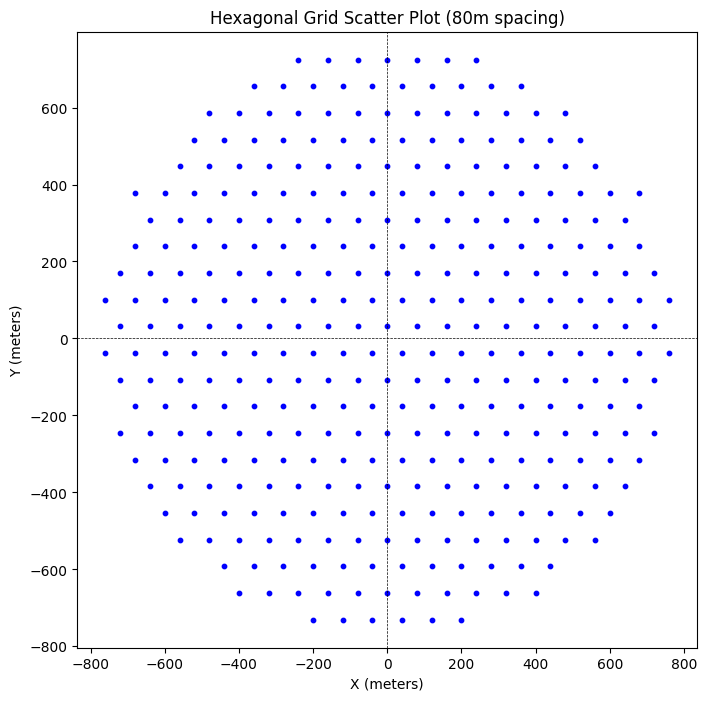

In [6]:
# Plot the hexagonal grid
plt.figure(figsize=(8, 8))
plt.scatter(grid_points[:, 0], grid_points[:, 1], color="blue", s=10, label="Hexagonal Grid Points")
# Labels and formatting
plt.xlabel("X (meters)")
plt.ylabel("Y (meters)")
plt.title(f"Hexagonal Grid Scatter Plot ({spacing}m spacing)")
plt.axhline(0, color="black", linestyle="--", linewidth=0.5)  # X-axis
plt.axvline(0, color="black", linestyle="--", linewidth=0.5)  # Y-axis

#plt.savefig("dots.png")

plt.show()


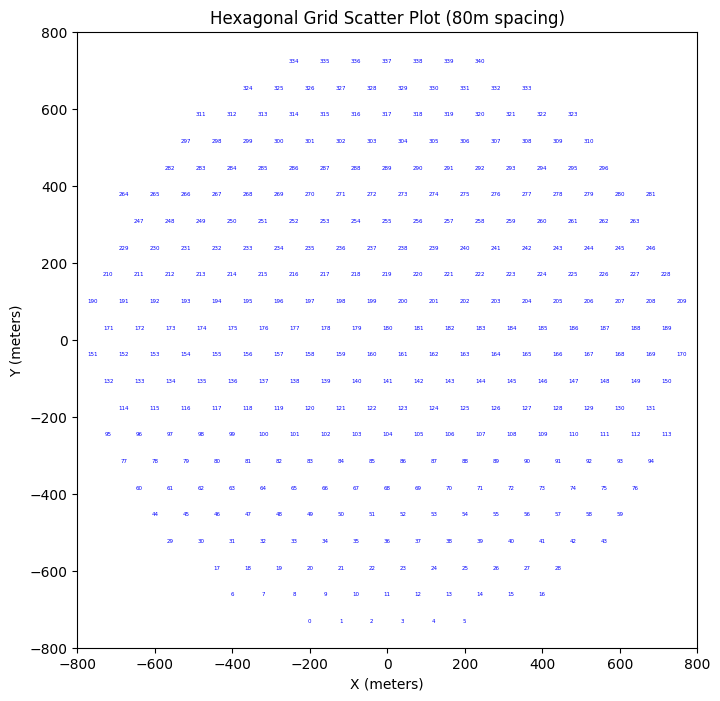

In [7]:
plt.figure(figsize=(8, 8))
for i, point in enumerate(grid_points):
    plt.text(point[0], point[1], str(i), color="blue", fontsize=4, ha='center', va='center')

# Labels and formatting
plt.xlabel("X (meters)")
plt.ylabel("Y (meters)")
plt.title(f"Hexagonal Grid Scatter Plot ({spacing}m spacing)")

plt.xlim(-maxradius,maxradius)
plt.ylim(-maxradius,maxradius)

#plt.savefig("numbered.png")

plt.show()

In [8]:
highlight_indices = [160, 161, 162, 180, 181, 179, 199, 200, 141, 142] + [252, 253, 254, 269, 270, 271, 272, 286, 287, 288] +\
                    [257, 258, 259, 274, 275, 276, 277, 291, 292, 293] + [146, 147, 165, 166, 167, 184, 185, 186, 204, 205] +\
                    [ 53,  54,  69,  70,  71,  87,  88,  89, 106, 107] + [ 49,  50,  65,  66,  67,  82,  83,  84, 101, 102] +\
                    [135, 136, 154, 155, 156, 174, 175, 176, 194, 195]

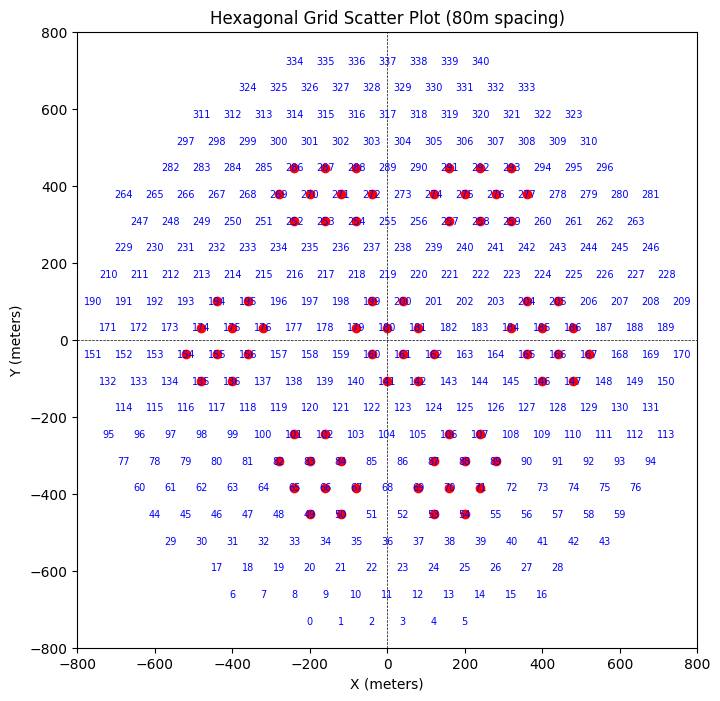

In [9]:
# Plot the hexagonal grid
plt.figure(figsize=(8, 8))
for i, point in enumerate(grid_points):
    plt.text(point[0], point[1], str(i), color="blue", fontsize=7, ha='center', va='center')

plt.scatter(grid_points[highlight_indices, 0], grid_points[highlight_indices, 1], color='red')

# Labels and formatting
plt.xlabel("X (meters)")
plt.ylabel("Y (meters)")
plt.title(f"Hexagonal Grid Scatter Plot ({spacing}m spacing)")
plt.axhline(0, color="black", linestyle="--", linewidth=0.5)  # X-axis
plt.axvline(0, color="black", linestyle="--", linewidth=0.5)  # Y-axis

plt.xlim(-maxradius,maxradius)
plt.ylim(-maxradius,maxradius)

# Show the plot
plt.show()

In [10]:
#wrtite to file
csv_grid= "grid_70string.csv"
with open(csv_grid, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(grid_points)